**K-Means clustering algorithm to a dataset about Facebook live sellers in Thailand.**

DataSetLink: https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand

1. **Data Preprocessing**:
   - Imported necessary libraries like `numpy`, `pandas`, `matplotlib`, and `seaborn`.
   - Loaded the dataset, inspected the shape (7050 instances, 16 attributes).
   - Explore categorical variables (`status_id`, `status_published`, `status_type`) and dropped `status_id` and `status_published` because they are unique identifiers for each instance.
   - Convert the categorical `status_type` into integer values using `LabelEncoder`.

2. **Feature Scaling**:
   - Applied `MinMaxScaler` to scale the feature vector to a range between 0 and 1, ensuring that all features have the same scale for the clustering model.

3. **K-Means Clustering**:
   - Initially, you applied K-Means clustering with 2 clusters
   - You used the elbow method to determine the optimal number of clusters.
   - You then tested different numbers of clusters (3 and 4).



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Live_20210128.csv")
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)

Shape of the dataset: (7050, 16)
Columns in the dataset: Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')


In [ ]:
data = data.dropna(axis=1, how='all')



In [ ]:
data = data.drop(["status_id", "status_published"], axis=1)

In [ ]:
label_encoder = LabelEncoder()
data['status_type'] = label_encoder.fit_transform(data['status_type'])



In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
data['status_type'] = label_encoder.fit_transform(data['status_type'])

In [ ]:
print("Missing values:\n", data.isnull().sum())


Missing values:
 status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64


In [ ]:
# Step 8: Scale the Features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

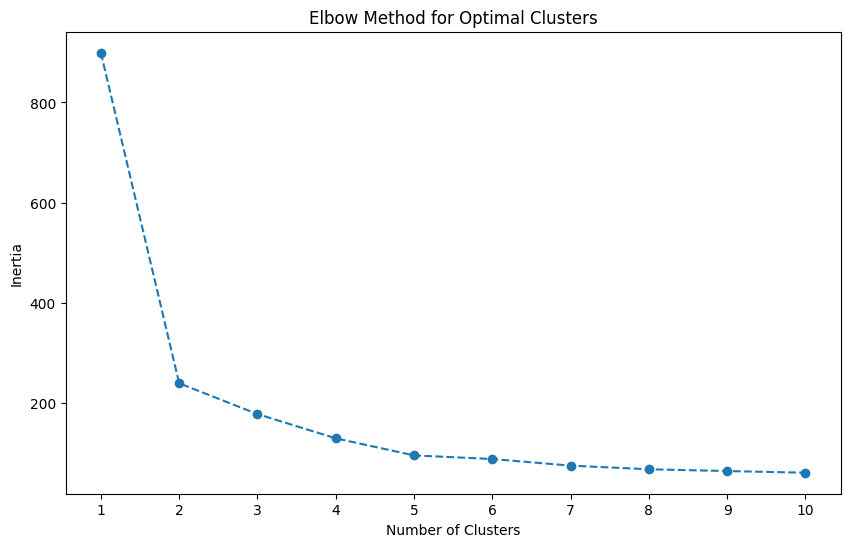

In [ ]:
inertia = []
cluster_range = range(1, 11)  # Test 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.show()








In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

<Axes: xlabel='num_reactions', ylabel='num_comments'>

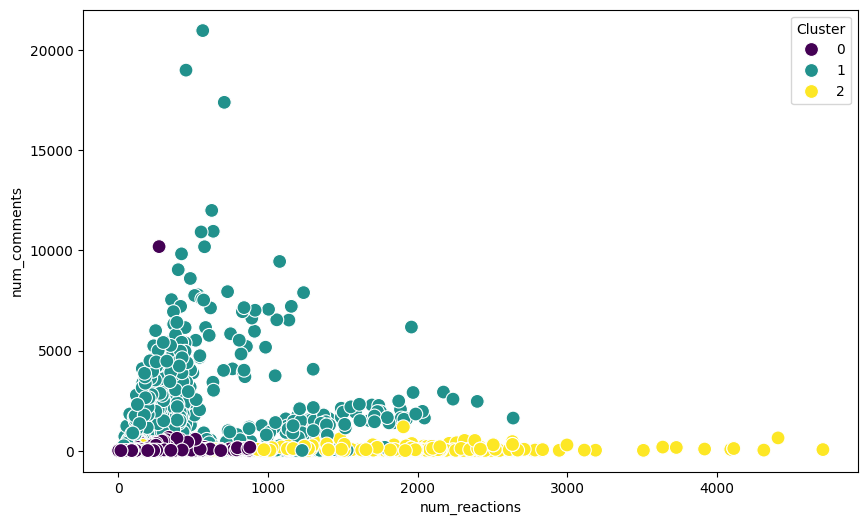

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['num_reactions'],
    y=data['num_comments'],
    hue=data['Cluster'],
    palette="viridis",
    s=100
)

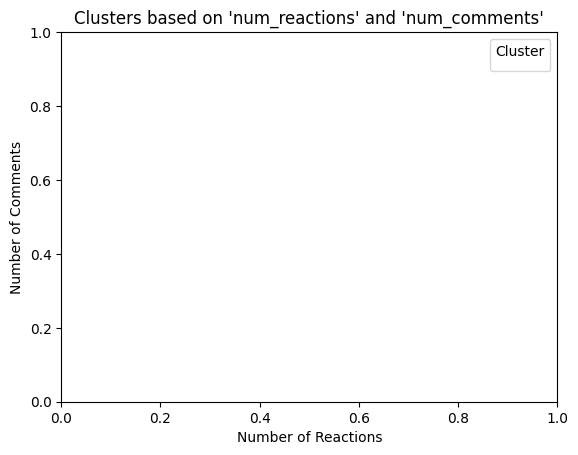

In [ ]:
plt.title("Clusters based on 'num_reactions' and 'num_comments'")
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Comments")
plt.legend(title="Cluster")
plt.show()

In [ ]:

cluster_summary = data.groupby("Cluster").mean()
print("\nCluster Summary:\n", cluster_summary)

data.to_csv("Clustered_Live_20210128.csv", index=False)
print("Clustered data saved as 'Clustered_Live_20210128.csv'")


Cluster Summary:
          status_type  num_reactions  num_comments  num_shares    num_likes  \
Cluster                                                                      
0           0.985919      89.895849     13.575868    1.798252    87.775188   
1           3.000000     245.534235    653.119494  117.385085   204.417793   
2           1.692790    1079.992163     44.181818    8.758621  1074.887147   

         num_loves  num_wows  num_hahas  num_sads  num_angrys  
Cluster                                                        
0         1.213159  0.536052   0.175528  0.145424    0.047342  
1        36.175752  2.491932   1.766245  0.421282    0.258613  
2         2.804075  1.830721   0.214734  0.239812    0.015674  
Clustered data saved as 'Clustered_Live_20210128.csv'
